In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mass = 1000
vi = 0
dt = 0.1
cd = 0.1

In [3]:
def velocity(throttle, current):
    #print(throttle, current)
    F = throttle - cd * current ** 2
    a = F/mass
    vf = current + a * dt # + np.random.normal(0, 0.1)
    return vf

In [4]:
kp = 100
ki = 1.5
kd = 50

In [5]:
# Variables to store previous values
prev_error = 0
integral = 0

def controller(target_speed, current_speed, obstacle_at, current_distance, dt):
    global prev_error, integral  # Keep values across function calls
    
    # Compute error
    error_distance = obstacle_at - 10 - current_distance
    error_speed = target_speed - current_speed
    error = error_distance * error_speed * 0.01 + error_distance
    
    # error = target_speed - current_speed
    
    # Proportional term
    p = error
    
    # Integral term (accumulate over time)
    integral += error * dt
    
    # Derivative term (rate of change of error)
    d = (error - prev_error) / dt if dt > 0 else 0 
    
    # Compute PID output
    output = (kp * p) + (ki * integral) + (kd * d)
    
    # Store error for next derivative calculation
    prev_error = error
    
    return output

In [6]:
# target_speeds = [80, 100, 50]  
# time_range_set = [(0, 100), (100, 150), (150, 250)] 

# current = vi
# result = []

# for i, target in enumerate(target_speeds):
#     t_init, t_end = time_range_set[i] 
#     initial_dist = 2000
#     previous_speed = current
#     # Reset initial distance for each segment
      
    
#     for t in np.arange(t_init, t_end, dt):
#         dist_remaining = initial_dist - current * (t - t_init)  # Distance remaining

#         # Stop the car if it reaches obstacle
#         if dist_remaining <= 0:
#             current = 0  
#             break
        
#         # slow down car when within 10 % of the target
#         if dist_remaining < (0.1 * initial_dist):
#             throttle = max(throttle - (0.005 * throttle), 0)

#         throttle = controller(target, current, dt)
#         current = max(velocity(throttle, current), 0)

#         result.append([t, throttle, current])

In [7]:
target_speed = 80
current_speed = vi

current_distance = 0
obstacle_at = 1000

result = []
for t in np.arange(0, 100, dt):
    throttle = controller(target_speed, current_speed, obstacle_at, current_distance, dt)
    current_speed = velocity(throttle, current_speed)

    current_distance += current_speed * dt
    result.append([t, throttle, current_distance, current_speed])

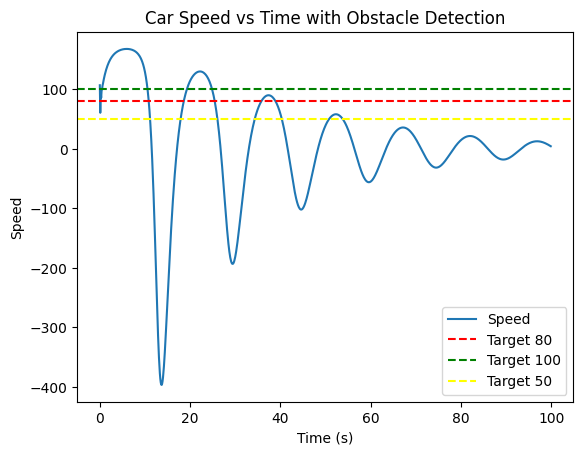

In [8]:
r = np.array(result)
plt.plot(r[:, 0], r[:, 3], label="Speed")
plt.axhline(80, color="red", linestyle="dashed", label="Target 80")
plt.axhline(100, color="green", linestyle="dashed", label="Target 100")
plt.axhline(50, color="yellow", linestyle="dashed", label="Target 50")

plt.xlabel("Time (s)")
plt.ylabel("Speed")
plt.legend()
plt.title("Car Speed vs Time with Obstacle Detection")
plt.show()

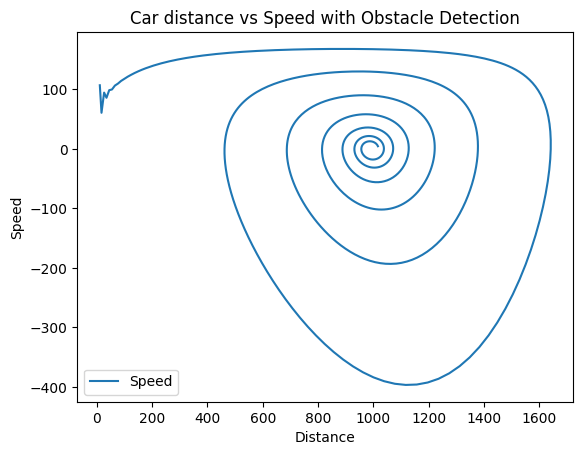

In [9]:
r = np.array(result)
plt.plot(r[:, 2], r[:, 3], label="Speed")
# plt.axhline(80, color="red", linestyle="dashed", label="Target 80")
# plt.axhline(100, color="green", linestyle="dashed", label="Target 100")
# plt.axhline(50, color="yellow", linestyle="dashed", label="Target 50")

plt.xlabel("Distance")
plt.ylabel("Speed")
plt.legend()
plt.title("Car distance vs Speed with Obstacle Detection")
plt.show()

In [10]:
np.set_printoptions(suppress=True, precision=1, threshold=1000)
r

array([[      0. , 1069467.3,      10.7,     106.9],
       [      0.1, -461376.6,      16.8,      60.7],
       [      0.2,  339514.7,      26.2,      94.6],
       ...,
       [     99.7,   -4533.4,    1016. ,       5.4],
       [     99.8,   -4610.5,    1016.5,       5. ],
       [     99.9,   -4679.4,    1016.9,       4.5]], shape=(1000, 4))

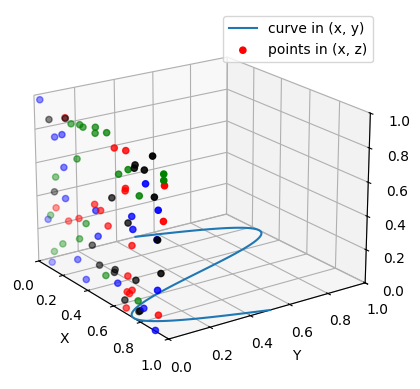

In [11]:
ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()